# NOTEBOOK POUR LA VISUALISATION DU CORPUS
>_il est important de rappeler que le corpus étudié ici représente un échantillon très restreint en termes de quantité de données_

In [4]:
#Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import spacy
import pandas as pd

In [6]:
#Chargement du corpus de référence 
dataset = pd.read_parquet("articles_cleaned.parquet")

#Importation du modèle pour le français
nlp = spacy.load("fr_core_news_md")

In [7]:
#Visualisation du corpus
dataset

,text,summary
0,Un très gros appareil photo est en route vers ...,"Cette caméra numérique, la plus puissante jama..."
1,D'impressionnantes aurores boréales ont illumi...,Des curieux du monde entier ont tenté de voir ...
2,"Selon le FBI, son équivalent britannique, Euro...",LockBitSupp est le cybercriminel le plus reche...
3,C’est une expérience unique en France. Devant ...,Le bousier a disparu dans les années 1960 de l...
4,Pour réduire le risque d'apparition de maladie...,Exercer une profession stimulante pour le cerv...
5,La nature se donne parfois en spectacle. Un ba...,"Phénomène très rare en France, des aurores bor..."
6,Il faut suivre un inventeur pour percevoir la ...,"Comme chaque année, le concours Lépine a disti..."
7,"Si vous avez raté le premier acte, rassurez-vo...","La tempête solaire qui a débuté vendredi, la p..."
8,Le ciel de Vendée teinté de rose et de violet....,"Si vous avez regardé le ciel vendredi 10 mai, ..."
9,Un festival dans toute la France et bien au-de...,"L'événement, visible vendredi soir, était néan..."


## Calcul de la longueur des textes _(contenu des articles)_ et des résumés

<Axes: title={'center': 'Distribution de la longueur du contenu des articles'}, xlabel='Longueur des textes', ylabel='Fréquence'>

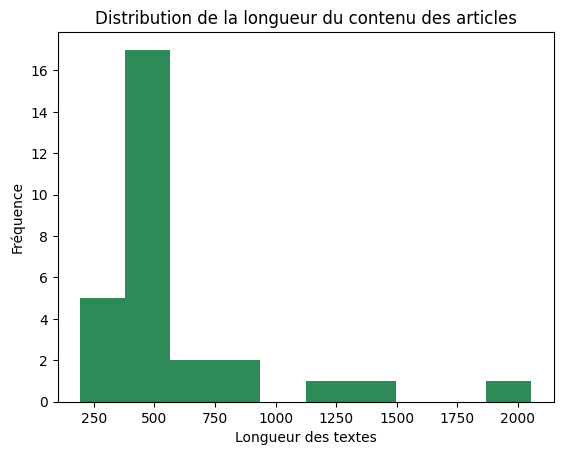

In [8]:
#Statistiques de visualisation pour longueur des textes
dataset["text_length"] = None
for i, text in enumerate(dataset["text"]):
    doc = nlp(text)
    dataset.loc[i, "text_length"] = len(doc)

plt.title("Distribution de la longueur du contenu des articles")
dataset["text_length"].plot(kind="hist", color="seagreen", xlabel="Longueur des textes", ylabel="Fréquence")

<Axes: title={'center': 'Distribution de la longueur des résumés des articles'}, xlabel='Longueur des résumés', ylabel='Fréquence'>

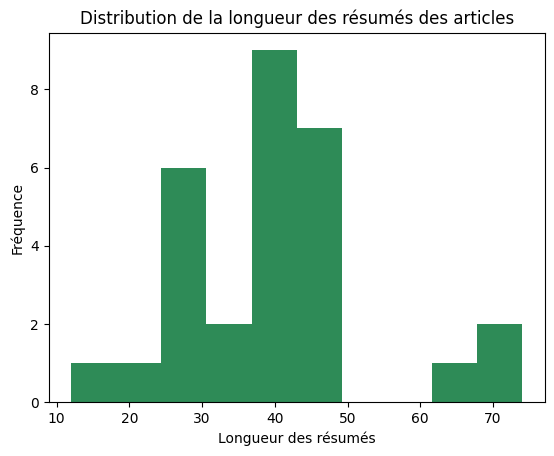

In [13]:
#Statistiques de visualisation pour longueur des descriptions
dataset["summary_length"] = None
for i, text in enumerate(dataset["summary"]):
    doc = nlp(text)
    dataset.loc[i, "summary_length"] = len(doc)

plt.title("Distribution de la longueur des résumés des articles")
dataset["summary_length"].plot(kind="hist", color="seagreen", xlabel="Longueur des résumés", ylabel="Fréquence")

<Axes: title={'center': 'Distribution du rapport résumé/texte'}, xlabel='Rapport résumé/texte', ylabel='Fréquence'>

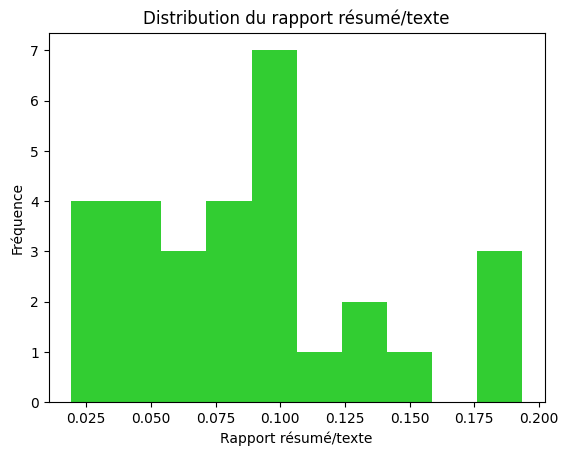

In [19]:
#Ratio taille des résumés/taille des textes
dataset["summary_to_text_ratio"] = dataset["summary_length"]/dataset["text_length"]

plt.title("Distribution du rapport résumé/texte")
dataset["summary_to_text_ratio"].plot(kind="hist", color="limegreen", xlabel="Rapport résumé/texte", ylabel="Fréquence")

Text(0.5, 1.0, 'Relation entre la longueur du texte et la longueur du résumé')

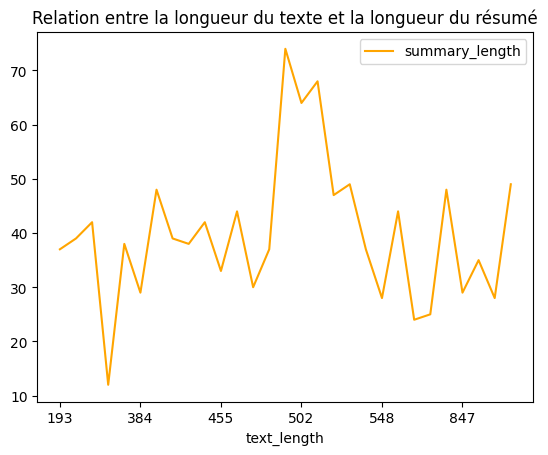

In [31]:
#Graphique de la relation entre la longueur des textes et celle des résumés associés
dataset.sort_values("text_length").plot("text_length", "summary_length", color="orange")
plt.title("Relation entre la longueur du texte et la longueur du résumé")

## Calcul de la loi de Zipf

Text(0.5, 1.0, 'Loi de Zipf : distribution de la fréquence des mots dans le corpus')

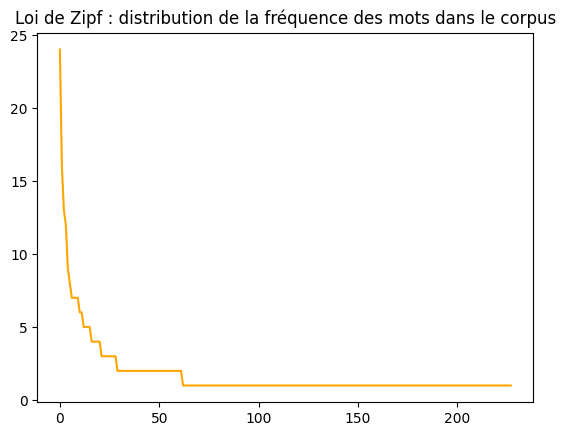

In [70]:
from collections import Counter

doc = nlp(dataset["text"][0])
tokens = []

for token in doc:
    tokens.append(token.text)

word_counts = Counter(tokens)
sorted_word_counts = sorted(word_counts.values(), reverse=True)

plt.plot(sorted_word_counts, color="orange")
plt.title("Loi de Zipf : distribution de la fréquence des mots dans le corpus")